In [172]:
df = pickle.load(open("df_fin.p", "rb"))

39,363 observations from Jan 1990 to Feb 2018 (Note: 1 or more victims per case):

In [311]:
df.shape

(39363, 24)

Descriptions without tilde to make text analysis simpler:

In [280]:
df['Description'] = df['Description'].apply(no_tilde) # no tildes

## I. Exploration

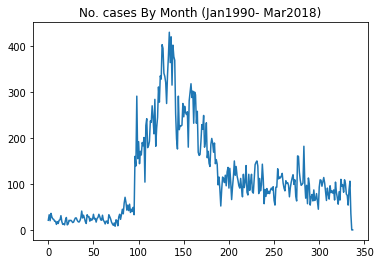

In [13]:
monthly_ts(df, 'No. cases By Month (Jan1990- Mar2018)')


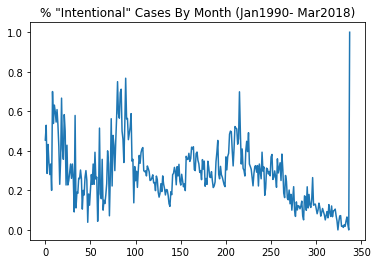

In [19]:
dm = plot_by_cont_filter(df, 'Type', 'INTENCIONAL', '% "Intentional" Cases By Month (Jan1990- Mar2018)')


Note: there is only one observation for Mar2018, and it is labelled as intentional, hence the "spike".

## 2. Additional Columns

Add the following columns, based on description texts:
- Weapon type (firegun, explosives, knife, machine-gun / large scale, unknown; can take multiple values)
- Number of victims (integer)
- Attack on infrastructure (dummy)
- Presence of torture (dummy)
- Presence of threat (dummy)
- Murder (dummy)
- Type of victim:
 - Government official (dummy)
 - Civic leader (dummy)
 - Farmer (dummy)



In [285]:
tort_words = ['tortur', 'golp', 'mutil', 'quema', 'quemo', 'desmembr', ' golpe']
threat_words = ['amenaz', 'advert', 'advirt', 'avis', 'pregunt', 'señal', 'veng', ' sapo']
gov_words = ['funcionario', 'Jefe', 'fisc','alcald', 'presidente', 'autorid', 'municipal',\
             ' palacio', 'procurador',  'juez', ' oficial', ' gob', 'candidat', 'Minist','\
             ministr' , 'Partido', 'Fiscalia', 'Presid', 'Procurad']
civ_words = ['lider', 'comisi',' civil', ' ciudadan', 'concej', ' consej', \
             ' sindic', 'Sindic' , 'gremi', 'Junta', 'Asocia', 'Concej', ' sacerd', ' relig',\
            'Organiz', 'dirigent', 'profes', 'maestr', 'director' , 'comunitar']
camp_words = ['Campes', 'campes', 'Hacend', 'hacend', 'agricult', 'ganade', 'Ganad', 'indig']
infr_words = (['puent', 'edif', 'coche', 'destru', ' escuel', 'escol', 'camion',\
               ' camin', 'oficin',' vehic', 'coch'], ['petard', 'bomb', 'explo', 'dinamit', \
                    'granad', 'deton' ' vias pub' , 'via pub'])

In [286]:
regex_pat = re.compile(r'\:(.*)', flags=re.IGNORECASE)
df['num_vict'] = df.Victim.str.extract(regex_pat)

In [287]:
armas = {'firegun':[' tiro', 'pistol', 'bala', 'bale', 'arma de fueg', 'ejecu', \
                    'dispar', 'rifl'],\
         'explosives': ['petard', 'bomb', 'explo', 'dinamit', ' polvor', ' humo', ' gas '
                     'mortero', 'deton' ,'granad', 'deton'],
         'machine gun / large cap': ['metrall', 'escopet'],
         'knive':['cuchill', 'navaj', ' cortad',' cortar', 'corto l', ' apuñ',' decapit', \
                  'clav', 'reban', 'mutil']}
df['weapon'] = df['Description'].apply(weapon, args=(armas,))

In [288]:
df['torture'] = df['Description'].apply(dummify_cont, args =(tort_words,))
df['threat'] = df['Description'].apply(dummify_cont, args =(threat_words,))
df['gov_vict'] = df['Description'].apply(dummify_cont, args =(gov_words,))
df['civ_leader'] = df['Description'].apply(dummify_cont, args =(civ_words,))
df['camp_vict'] = df['Description'].apply(dummify_cont, args =(camp_words,))
df['infr'] = df['Description'].apply(infr_cont, args =(infr_words,))

In [289]:
df['murder'] = df['Type'].str.contains('HOMICIDIO')
df['murder'] = np.where(df['murder']== True, 1, 0)

In [290]:
df['int'] = df['Type'].str.contains('INTENCIONAL')
df['int'] = np.where(df['int']== True, 1, 0)

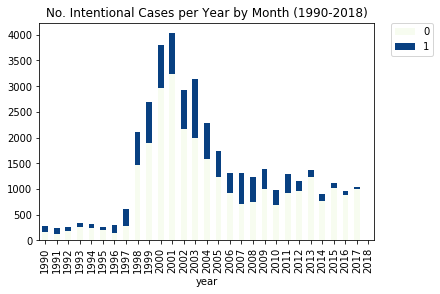

In [291]:
graph_by_year(df, title = "No. Intentional Cases per Year by Month (1990-2018)", factor= 'int')

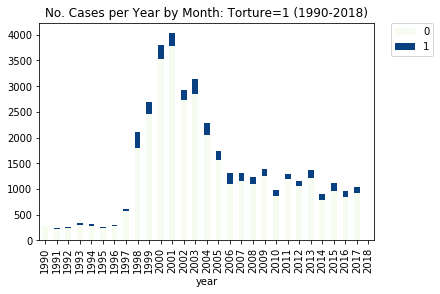

In [292]:
graph_by_year(df, title = "No. Cases per Year by Month: Torture=1 (1990-2018)",\
              factor= 'torture')

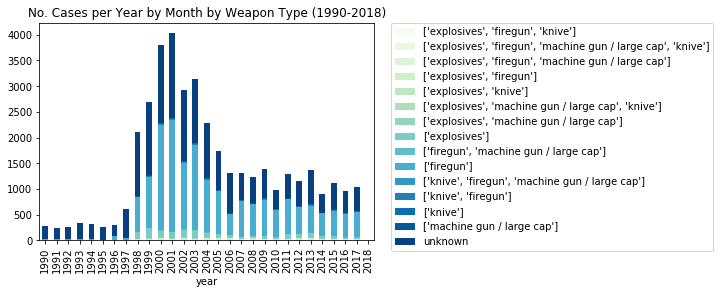

In [293]:
graph_by_year(df, title = "No. Cases per Year by Month by Weapon Type (1990-2018)", \
              factor= 'weapon')

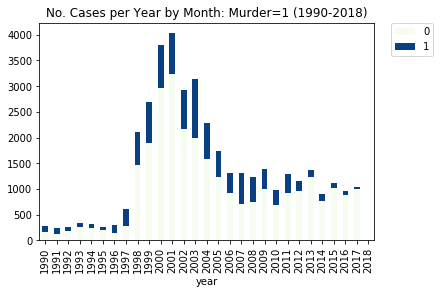

In [294]:
graph_by_year(df, title = "No. Cases per Year by Month: Murder=1 (1990-2018)", factor= 'murder')

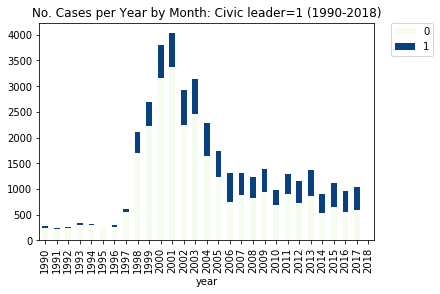

In [295]:
graph_by_year(df, title = "No. Cases per Year by Month: Civic leader=1 (1990-2018)",\
              factor= 'civ_leader')

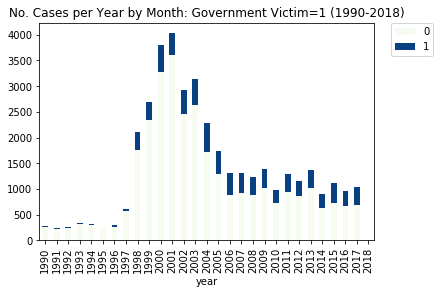

In [296]:
graph_by_year(df, title = "No. Cases per Year by Month: Government Victim=1 \
(1990-2018)", factor= 'gov_vict')

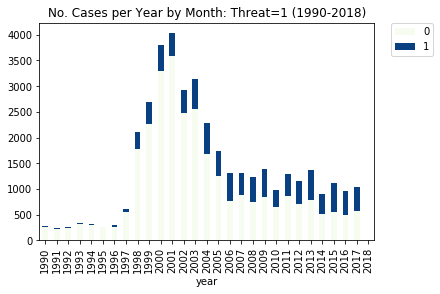

In [297]:
graph_by_year(df, title = "No. Cases per Year by Month: Threat=1 (1990-2018)", factor= 'threat')

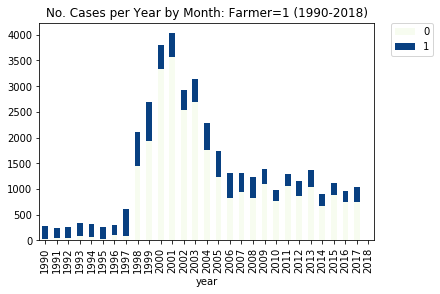

In [298]:
graph_by_year(df, title = "No. Cases per Year by Month: Farmer=1 (1990-2018)", \
              factor= 'camp_vict')

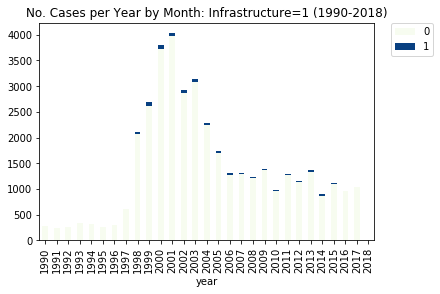

In [299]:
graph_by_year(df, title = "No. Cases per Year by Month: Infrastructure=1 (1990-2018)", \
              factor= 'infr')

In [300]:
df[df['infr']==1].shape # 761 total cases of explosion over infrastructure

(761, 24)

##  3. Random samples

From the observations labelled as 1 for each of the new dummies, we randomly pick 20, in order to inspect their associated description:

In [308]:
lst = ['int', 'threat', 'gov_vict', 'torture', 'civ_leader', 'infr']
def get_samples(df, lst, n):
    df_lst = []
    for var in lst:
        df_samp = df[df[var] == 1].sample(n)
        df_lst.append(df_samp.Description)
        df_samp.to_csv(var+'.csv')
    return df_lst

In [310]:
samples = get_samples(df, lst, 20)
intenc, threats, gov, tort, civ, infr = samples[0], samples[1], samples[2], samples[3], \
samples[4], samples[5]

One example of 'intentional' (the rest for all the variables (20 ex per var) are in csv I sent:

In [304]:
intenc.iloc[10]

'Tres paramilitares armados y encapuchados ejecutaron desde una motocicleta al alcalde de la localidad y a su escolta a varias cuadras del sitio de la celebracion del año nuevo en la plaza central de la poblacion. El ataque se produjo a las 3:40 a.m. luego que el burgomaestre se retiro de los festejos y se desplazba a pie rumbo a su casa. El alcalde se habia caracterizado por denunciar la presencia amenazante de grupos paramilitares en su jurisdiccion previo a la masacre perpetrada en el municipio el pasado 25 de octubre por estos grupos. Durante el desarrollo de aquella incursion paramilitar, habian intentado aprehenderlo sin exito, reteniendo a su esposa por espacio de varias horas.'